In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [105]:
df = pd.read_excel('boulders.xlsx')
df.head()

,Area,Sector,Boulder,Sit start,Grade,Inclination,Height,Landing,Style (crux),Date,Tries,Sent,Grade felt,Video,Comments
0,La Pedriza,Canto Cochino Oeste,B7L6,yes,6A+,slight overhang,low,ok,top out,2021-12-17,1.0,yes,5,NaN,NaN
1,La Pedriza,Canto Cochino Oeste,Musgoevash (B3L3),no,6B+,vertical,low,good,slopers,2021-12-17,3.0,no,6B+,NaN,I couldn't top out
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31,1.0,yes,6B+,NaN,NaN
3,La Pedriza,Canto Cochino Oeste,La huevera (B1L5),no,6A+,vertical,medium,good,mantel,2021-12-17,3.0,yes,6A+,NaN,NaN
4,La Pedriza,Canto Cochino Oeste,La zorrera,yes,6C,overhang,medium,good,power,2021-12-17,5.0,yes,6C,NaN,NaN


In [106]:
# Fill NaN values of the 'Sent' column with 'no'
df['Sent'] = df['Sent'].fillna('no')

# find the rows where the 'Boulder' column is null
null = df[df['Boulder'].isnull()]['Tries']

# add the previous value of the 'Tries' column to the rows where null is True
for i in range(len(null)):
    df.loc[null.index[i], 'Tries'] += df.loc[null.index[i]-1, 'Tries']

# fill NaN values with the the values from the previous row and
df = df.fillna(method='ffill')

# set 'Grade' column to type string
df = df.astype({'Grade': 'str'})

df.head()

,Area,Sector,Boulder,Sit start,Grade,Inclination,Height,Landing,Style (crux),Date,Tries,Sent,Grade felt,Video,Comments
0,La Pedriza,Canto Cochino Oeste,B7L6,yes,6A+,slight overhang,low,ok,top out,2021-12-17,1.0,yes,5,NaN,NaN
1,La Pedriza,Canto Cochino Oeste,Musgoevash (B3L3),no,6B+,vertical,low,good,slopers,2021-12-17,3.0,no,6B+,NaN,I couldn't top out
2,La Pedriza,Canto Cochino Oeste,Musgoevash (B3L3),no,6B+,vertical,low,good,slopers,2021-12-31,4.0,yes,6B+,NaN,I couldn't top out
3,La Pedriza,Canto Cochino Oeste,La huevera (B1L5),no,6A+,vertical,medium,good,mantel,2021-12-17,3.0,yes,6A+,NaN,I couldn't top out
4,La Pedriza,Canto Cochino Oeste,La zorrera,yes,6C,overhang,medium,good,power,2021-12-17,5.0,yes,6C,NaN,I couldn't top out


In [107]:
# filter rows that have value "yes" in the "Sent" column
sent = df[df['Sent'] == 'yes']
sent.head()

,Area,Sector,Boulder,Sit start,Grade,Inclination,Height,Landing,Style (crux),Date,Tries,Sent,Grade felt,Video,Comments
0,La Pedriza,Canto Cochino Oeste,B7L6,yes,6A+,slight overhang,low,ok,top out,2021-12-17,1.0,yes,5,NaN,NaN
2,La Pedriza,Canto Cochino Oeste,Musgoevash (B3L3),no,6B+,vertical,low,good,slopers,2021-12-31,4.0,yes,6B+,NaN,I couldn't top out
3,La Pedriza,Canto Cochino Oeste,La huevera (B1L5),no,6A+,vertical,medium,good,mantel,2021-12-17,3.0,yes,6A+,NaN,I couldn't top out
4,La Pedriza,Canto Cochino Oeste,La zorrera,yes,6C,overhang,medium,good,power,2021-12-17,5.0,yes,6C,NaN,I couldn't top out
7,La Pedriza,Canto Cochino Oeste,La zorrera directa,yes,6C+,overhang,medium,good,power,2021-12-31,8.0,yes,6C+,NaN,I did all the moves; but didn't have any energ...


['4' '5' '6A' '6A+' '6B' '6B+' '6C' '6C+' '7A'] 9


<AxesSubplot: ylabel='Grade'>

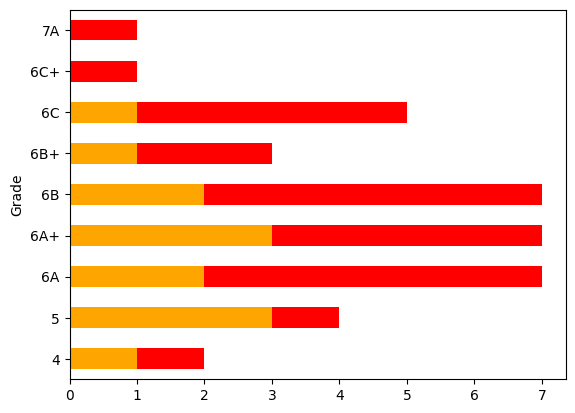

In [112]:
# get the distinct values of the 'Grade' column where the 'Sent' column is 'yes'
grades = np.sort(sent['Grade'].unique())
print(grades, grades.size)

# plot the number of sent boulders per grade horizontally
df[(df['Sent'] == 'yes')].groupby('Grade').size().plot(kind='barh', color='red')

# add the number of boulders flashed to the plot; add zeros to grades that were not flashed
flashed = df[(df['Sent'] == 'yes') & (df['Tries'] == 1)].groupby('Grade').size()
flashed = flashed.reindex(grades, fill_value=0)
flashed.plot(kind='barh', color='orange')